### What is Waveform?

In [32]:
###Import the packages
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import HTML
import urllib.request as request
import soundfile as sf
import io
import IPython.display as ipd
from IPython.display import Image

In [2]:
### Wavefiles of different sound from wikipedia
### Instances of sound wavefiles and the corresponding Spectra

vowel_pathnames = {
        'i' : '9/91/Close_front_unrounded_vowel',
        'ɪ' : '4/4c/Near-close_near-front_unrounded_vowel',
        'e' : '6/6c/Close-mid_front_unrounded_vowel',
        'ɛ' : '7/71/Open-mid_front_unrounded_vowel',
        'æ' : 'c/c9/Near-open_front_unrounded_vowel',
        'u' : '5/5d/Close_back_rounded_vowel',
        'ʊ' : 'd/d5/Near-close_near-back_rounded_vowel',
        'o' : '8/84/Close-mid_back_rounded_vowel',
        'ʌ' : '9/92/Open-mid_back_unrounded_vowel',
        'ɑ' : 'e/e5/Open_back_unrounded_vowel',
        'ə' : 'd/d9/Mid-central_vowel',
        'ɝ' : 'e/e1/En-us-er'
}
    
vowel_waves = {}

for v_ipa,v_pathname in vowel_pathnames.items():
    v_url = 'https://upload.wikimedia.org/wikipedia/commons/{}.ogg'.format(v_pathname)
    try:
        req = request.urlopen(v_url)
    except request.HTTPError:
        print('Unable to download {}'.format(v_url))
    else:
        v_wav,v_fs = sf.read(io.BytesIO(req.read()))
        v_filename = v_pathname[5:] + '.wav'
        sf.write(v_filename,v_wav,v_fs)
        vowel_waves[v_ipa] = v_wav

print('Donwnloaded these phones: {}'.format(vowel_waves.keys()))

Donwnloaded these phones: dict_keys(['i', 'ɪ', 'e', 'ɛ', 'æ', 'u', 'ʊ', 'o', 'ʌ', 'ɑ', 'ə', 'ɝ'])


In [36]:
ipd.Audio(vowel_waves['ɑ'],rate=v_fs)

In [37]:
ipd.Audio(vowel_waves['i'],rate=v_fs)

In [38]:
ipd.Audio(vowel_waves['u'],rate=v_fs)

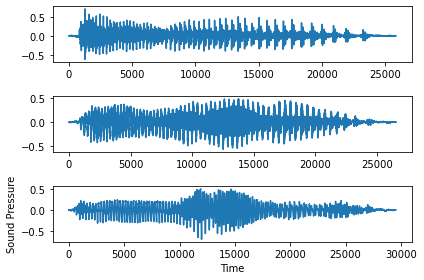

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.plot(vowel_waves['ɑ'])
ax2.plot(vowel_waves['i'])
ax3.plot(vowel_waves['u'])
plt.xlabel('Time')
plt.ylabel('Sound Pressure')
plt.tight_layout()

## Concepts
- nodes, antinodes
- velocity and pressure wave
- closed-open and closed-closed tubes 
- Perturbation theory
- Tube Models

Text(0, 0.5, 'Pressure')

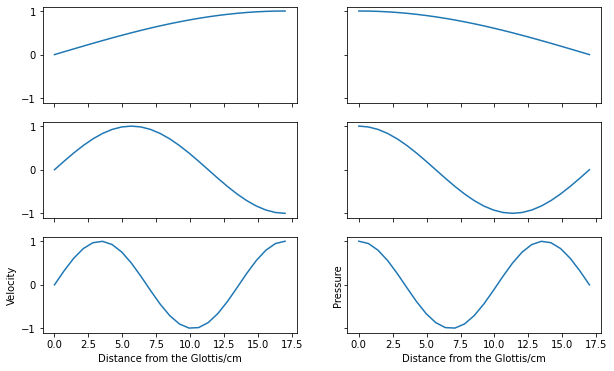

In [39]:
## closed at one end and open at the other
f1=500
f2=1500
f3=2500
dur = 1/f1/4
vt = 17
c = 34000
t1= np.linspace(0,dur, int(dur*f1*100), endpoint=True)
x = t1 * vt
y1 = np.sin(2*np.pi*f1*t1)
y2 = np.sin(2*np.pi*f2*t1)
y3 = np.sin(2*np.pi*f3*t1)

p1 = np.cos(2*np.pi*f1*t1)
p2 = np.cos(2*np.pi*f2*t1)
p3 = np.cos(2*np.pi*f3*t1)
fig, ax = plt.subplots(3, 2, figsize=(10,6),sharey='all', sharex='all')

ax[0,0].plot(t1*c, y1)
ax[1,0].plot(t1*c, y2)
ax[2,0].plot(t1*c, y3)

ax[0,1].plot(t1*c, p1)
ax[1,1].plot(t1*c, p2)
ax[2,1].plot(t1*c, p3)

ax[2,0].set_xlabel('Distance from the Glottis/cm')
ax[2,0].set_ylabel('Velocity')
ax[2,1].set_xlabel('Distance from the Glottis/cm')
ax[2,1].set_ylabel('Pressure')

Text(0, 0.5, 'Pressure')

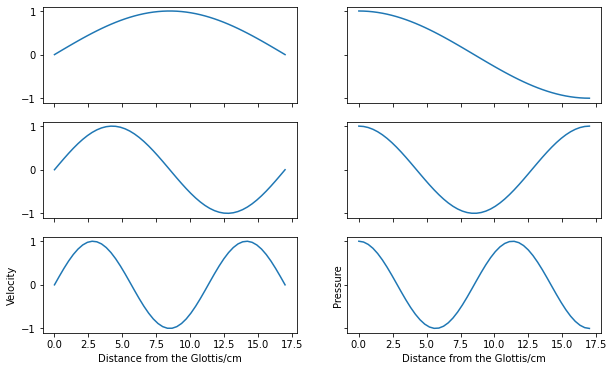

In [41]:
## Closed at both ends
f1=1000
f2=2000
f3=3000
dur = 1/f1/2
vt = 17
c = 34000
t1= np.linspace(0,dur, int(dur*f1*100), endpoint=True)
x = t1 * vt
y1 = np.sin(2*np.pi*f1*t1)
y2 = np.sin(2*np.pi*f2*t1)
y3 = np.sin(2*np.pi*f3*t1)

p1 = np.cos(2*np.pi*f1*t1)
p2 = np.cos(2*np.pi*f2*t1)
p3 = np.cos(2*np.pi*f3*t1)
fig, ax = plt.subplots(3, 2, figsize=(10,6),sharey='all', sharex='all')

ax[0,0].plot(t1*c, y1)
ax[1,0].plot(t1*c, y2)
ax[2,0].plot(t1*c, y3)

ax[0,1].plot(t1*c, p1)
ax[1,1].plot(t1*c, p2)
ax[2,1].plot(t1*c, p3)

ax[2,0].set_xlabel('Distance from the Glottis/cm')
ax[2,0].set_ylabel('Velocity')
ax[2,1].set_xlabel('Distance from the Glottis/cm')
ax[2,1].set_ylabel('Pressure')

### Perturbation Theory
- Increasing the pressure (that is, making a constriction) near a velocity antinode will $\textit{DECREASE}$ particle velocity and thus frequency; an expansion increases it
- Increasing the pressure near the velocity node will $\textit{RAISE}$ the the frequency; an expansion decreases it.

### Analysis of vowel formants relative to the schwa based on Perturbation theory

- /i/
    - a constriction in the palatal region and an expansion in the pharyngeal region
- /u/
    - two constrictions: labial and dorsal
- /a/
    - a constriction in the pharyngeal region and front cavity expansion 
- /ɚ/
    - a constriction in the post-alveolar region

<img src="img/pert.png" width=400>

### Note:
- the rules of Perturbation Theory apply in a gradient way
- the greater the magnitude of constriction (or expansion), the greater their effect
- the closer the site of the constriction (or expansion) is to a node or antinode, the greater their effect
- we will not predict exaclty what the formants will be for other vowels and vowels in transition ... we will just make predictions relative to the formants of /ə/.

### Tube Models
- picture the vocal tract as a series of tubes of differen sizes with different boundary conditions

<img src="img/tube.png" width=400>

### Spectrogram
- Narrow-band spectrogram: over larger windows in time, more accurate harmonic information
- Wide-band spectrogram: over smaller windows in time, more obvious formant information

In [47]:
a = 34000/24

In [48]:
print(3*a)

4250.0


In [50]:
b=34000/44
print(b)

772.7272727272727


In [51]:
print(3*b)

2318.181818181818
